In [174]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


In [175]:
np.random.seed(0)

In [176]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [177]:
print(X_train.shape)
print(X_train.shape[1])
print(y_train[100])


(60000, 28, 28)
28
5


In [178]:
assert(X_train.shape[0]==y_train.shape[0]), "the nmber of images is not equal to no of lables"
assert(X_test.shape[0]==y_test.shape[0]), "the nmber of images is not equal to no of lables"
assert(X_train.shape[1:]==(28,28)), "The dimesions of the images are not 28X28"
assert(X_test.shape[1:]==(28,28)), "The dimesions of the images are not 28X28"


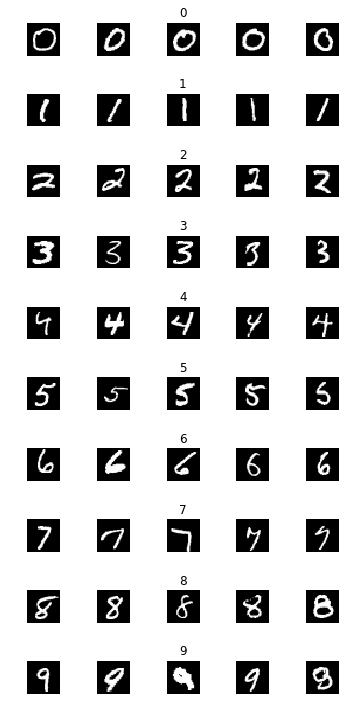

In [179]:
num_of_samples=[]
cols=5
num_classes=10
fig, axs=plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected -1)), :,:], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

<BarContainer object of 10 artists>

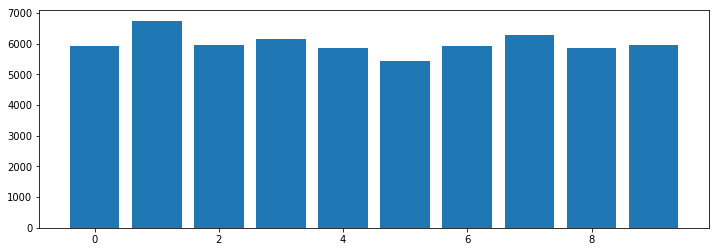

In [180]:
num_of_samples
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)

In [181]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [182]:
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [183]:
X_train=X_train/255
X_test=X_test/255

In [184]:
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [185]:
model=leNet_model()
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               188000    
___________________________

In [186]:
hitory=model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
46800/54000 [=========================>....] - ETA: 6s - loss: 0.2747 - acc: 0.9113

KeyboardInterrupt: 

In [ ]:
plt.plot(hitory.history['loss'])
plt.plot(hitory.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [ ]:
plt.plot(hitory.history['acc'])
plt.plot(hitory.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('acc')
plt.xlabel('epochs')

In [ ]:

import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1, 28, 28, 1)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))




In [ ]:


score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

